In [1]:
%matplotlib inline  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
up_df=pd.read_excel('up_gene_count_ID.xls')

In [24]:
up_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 8 columns):
Expr Intensity/RPKM/FPKM/Counts    815 non-null int64
ID                                 815 non-null int64
Flags                              815 non-null object
Symbol                             815 non-null object
Entrez Gene Name                   815 non-null object
Location                           815 non-null object
Type(s)                            815 non-null object
Drug(s)                            815 non-null object
dtypes: int64(2), object(6)
memory usage: 51.0+ KB


In [25]:
up_df.columns=['count','ID', 'flags', 'symbol', 'GeneName', 'location','type', 'drug']

In [26]:
up_df.head()

,count,ID,flags,symbol,GeneName,location,type,drug
0,3,1906,,EDN1,endothelin 1,Extracellular Space,cytokine,
1,8,3553,,IL1B,interleukin 1 beta,Extracellular Space,cytokine,"canakinumab, gevokizumab, canakinumab/INS, gal..."
2,9,200734,,SPRED2,sprouty related EVH1 domain containing 2,Extracellular Space,cytokine,
3,10,6696,,SPP1,secreted phosphoprotein 1,Extracellular Space,cytokine,
4,14,10451,,VAV3,vav guanine nucleotide exchange factor 3,Extracellular Space,cytokine,


In [27]:
up_types=up_df['type'].unique()

In [28]:
up_types

array(['cytokine', 'enzyme', 'G-protein coupled receptor', 'growth factor',
       'ion channel', 'kinase', 'ligand-dependent nuclear receptor',
       'other', 'peptidase', 'phosphatase', 'transcription regulator',
       'translation regulator', 'transmembrane receptor', 'transporter'], dtype=object)

In [29]:
up=up_df.groupby('type').agg({'count': 'sum'})

In [61]:
percentage=up['count']/up['count'].sum()*100

In [62]:
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(up.index.values,percentage)]

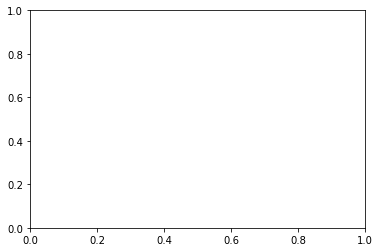

In [63]:
fig, ax = plt.subplots()

In [64]:
patches, texts = ax.pie(up['count'], labels=labels, labeldistance=1.2, radius=0.4)

In [65]:
ax.axis('equal')
ax.tick_params(labelsize=12)

In [66]:
for t in texts:
    t.set_size('large')

In [67]:
plt.draw()

In [68]:
plt.show()

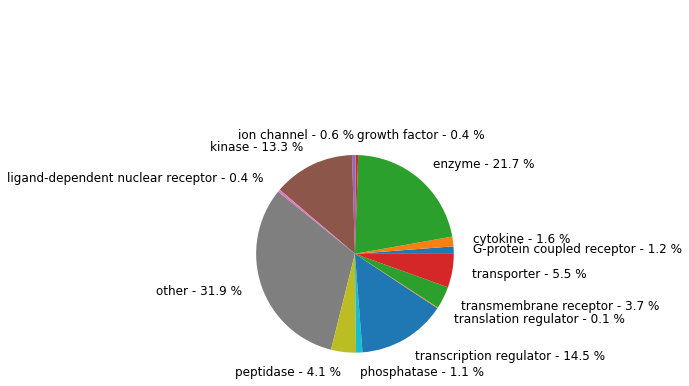

In [69]:
fig

In [70]:

fig.set_size_inches(13, 4)
fig.savefig('up_regulated_genes_test00.png', dpi=600 )

Down

In [2]:
dn_df=pd.read_excel('dn_gen_count_ID.xls')

In [3]:
dn_df.head()

,Expr Intensity/RPKM/FPKM/Counts,ID,Flags,Symbol,Entrez Gene Name,Location,Type(s),Drug(s)
0,5,16,,AARS,alanyl-tRNA synthetase,Cytoplasm,enzyme,
1,2,10058,,ABCB6,ATP binding cassette subfamily B member 6 (Lan...,Cytoplasm,transporter,
2,2,10057,,ABCC5,ATP binding cassette subfamily C member 5,Plasma Membrane,transporter,
3,6,23,,ABCF1,ATP binding cassette subfamily F member 1,Cytoplasm,transporter,
4,14,55324,,ABCF3,ATP binding cassette subfamily F member 3,Other,transporter,


In [4]:
dn_df.columns=['count','ID', 'flags', 'symbol', 'GeneName', 'location','type', 'drug']

In [5]:
dn_types=dn_df['type'].unique()

In [6]:
dn_types

array(['enzyme', 'transporter', 'peptidase', 'other',
       'G-protein coupled receptor', 'transcription regulator',
       'ion channel', 'kinase', 'translation regulator',
       'transmembrane receptor', 'phosphatase', 'cytokine',
       'growth factor', 'ligand-dependent nuclear receptor'], dtype=object)

In [7]:
dn=dn_df.groupby('type').agg({'count': 'sum'})

In [8]:
dn

,count
type,
G-protein coupled receptor,39
cytokine,74
enzyme,2462
growth factor,47
ion channel,58
kinase,571
ligand-dependent nuclear receptor,83
other,3334
peptidase,279


In [9]:
percentage=dn['count']/dn['count'].sum()*100

In [10]:
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(dn.index.values,percentage)]

In [11]:
labels

['G-protein coupled receptor - 0.4 %',
 'cytokine - 0.8 %',
 'enzyme - 26.4 %',
 'growth factor - 0.5 %',
 'ion channel - 0.6 %',
 'kinase - 6.1 %',
 'ligand-dependent nuclear receptor - 0.9 %',
 'other - 35.7 %',
 'peptidase - 3.0 %',
 'phosphatase - 3.2 %',
 'transcription regulator - 8.8 %',
 'translation regulator - 1.3 %',
 'transmembrane receptor - 1.5 %',
 'transporter - 10.8 %']

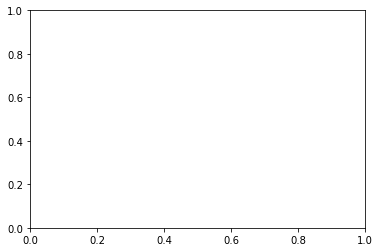

In [12]:
fig, ax = plt.subplots()

In [13]:
patches, texts = ax.pie(dn['count'],labels=labels, labeldistance=1.2, radius=0.4)

In [14]:
ax.axis('equal')

(-0.44703012878514803,
 0.44033477416283751,
 -0.44041970239038647,
 0.44388939220869439)

In [25]:
for t in texts:
    t.set_fontsize(14)

In [26]:
plt.draw()

In [27]:
plt.show()

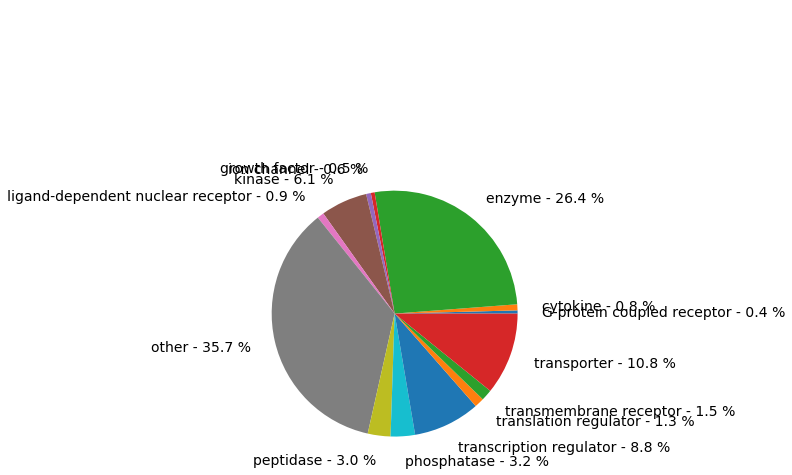

In [28]:
fig

In [29]:
fig.set_size_inches(13, 5)
fig.savefig('dn_regulated_genes_test2.png', dpi=600 )